In [3]:
import pandas as pd
from io import StringIO
import numpy as np



In [ ]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
print(csv_data)

In [ ]:
# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

In [ ]:
df.isnull().sum()


Although scikit-learn was developed for working with NumPy arrays, it can sometimes be more convenient to preprocess data using pandas' DataFrame. We can always access the underlying NumPy array of the DataFrame via the values attribute before we feed it into a scikit-learn estimator:

In [ ]:
df.values

One of the easiest ways to deal with missing data is to simply remove the corresponding features (columns) or samples (rows) from the dataset entirely;rows with missing values can be easily dropped via the dropna method:

In [ ]:
df.dropna()

In [ ]:
df.dropna(axis=1)

In [ ]:
# only drop rows where all columns are NaN
df.dropna(how='all')


In [ ]:

# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)


In [ ]:

# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

In [ ]:
df['D'] = df['D'].replace(np.nan ,0)
print(df)

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan,strategy='mean')
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

### Handling categorical data


In [ ]:
import pandas as pd
df = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

In [ ]:
size_mapping = { 'XL': 3,
                'L': 2,
                'M': 1}
df['size'] = df['size'].map(size_mapping)
df

In [ ]:
# inv_size_mapping = {v: k for k, v in size_mapping.items()}
# df['size'] = df['size'].map(inv_size_mapping)
# df

In [ ]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

In [ ]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

In [ ]:
df

We can reverse the key-value pairs in the mapping dictionary as follows to map the converted class labels back to the original string representation:


In [ ]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

In [ ]:
class_le.inverse_transform(y)

In [ ]:
X = df[['color', 'size', 'price']].values
print(X)

In [ ]:

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

In [ ]:
X

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories=['color'])
ohe.fit_transform(X).toarray()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# X = [[0, 'a'], [0, 'b'], [1, 'a'], [2, 'b']]
print(X)
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

X = ct.fit_transform(X)
print(X)

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']])

In [1]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash','Alcalinity of ash', 
                   'Magnesium','Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols','Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()

NameError: name 'pd' is not defined

In [6]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1, random_state=0, solver="saga")
# lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9629629629629629


In [27]:
lr.intercept_

array([ 0.01413444,  0.31137593, -0.32551037])

In [28]:
lr.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26509706,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.96540364],
       [-0.64746491,  0.        , -0.05070221,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.61102139,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.47923936,  0.        ,  0.        ,  0.        ,
        -0.32545159, -0.71776613,  0.        ]])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

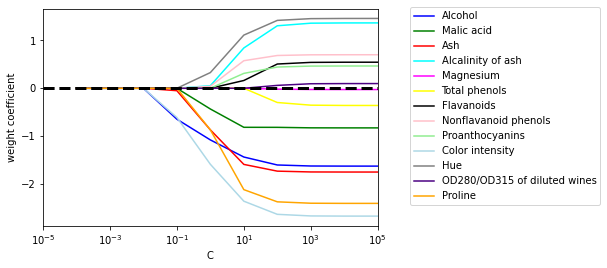

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
            'magenta', 'yellow', 'black',
            'pink', 'lightgreen', 'lightblue',
            'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1',C=10**c.item(),random_state=0, solver="saga")
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c.item())
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
    label=df_wine.columns[column+1],
    color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.show()